In [1]:
import pandas as pd
dataset = pd.read_csv('Chapter7_PVT Data.csv') 
print(dataset.describe())

       Temperature           Rs  Gas Gravity     Oil API          Pbp
count   249.000000   249.000000   249.000000  249.000000   249.000000
mean    147.796271   411.145756     1.012870   31.658760  1424.602150
std      41.936641   291.829082     0.162192    5.036067   908.669973
min      70.447234    27.832416     0.797048   17.854225   131.484967
25%     116.365357   183.034832     0.885612   28.469070   697.772696
50%     142.257643   348.735793     0.978741   32.604282  1252.802615
75%     176.074354   587.055416     1.113760   35.875571  1937.635034
max     282.911419  1471.094081     1.632588   39.714096  4306.643567


In [2]:
X=dataset.iloc[:,0:4]
y=dataset.iloc[:,4].values
from sklearn.preprocessing import  MinMaxScaler
sc= MinMaxScaler()
Xnorm=pd.DataFrame(data= sc.fit_transform(X))
yshape=pd.DataFrame(data= y.reshape(-1,1))
ynorm=pd.DataFrame(data=sc.fit_transform(yshape))


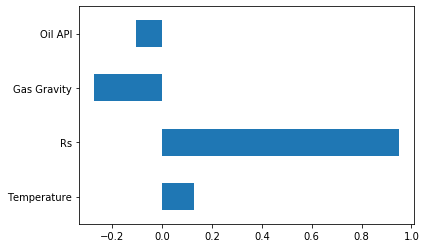

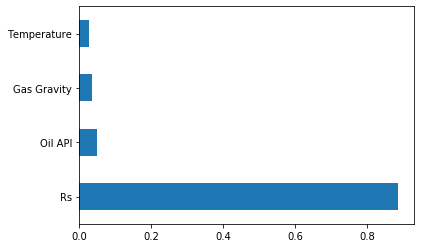

In [3]:
# “Spearman’s Rank Correlation” feature ranking
from scipy import stats
import matplotlib.pyplot as plt
datanorm=sc.fit_transform(dataset)
stats.spearmanr(dataset)
rho, pval = stats.spearmanr(datanorm)
corr= pd.Series(rho[:4,4], index=X.columns)
corr.plot(kind='barh')
plt.show()
# “Random Forest” feature ranking
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=10, random_state=0)
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()

In [4]:
import numpy as np
seed=50
np.random.seed(seed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xnorm, ynorm, test_size=0.3)

from sklearn.neural_network import MLPRegressor
np.random.seed(seed)
clf = MLPRegressor(hidden_layer_sizes=(7),  activation='tanh', solver='lbfgs',    alpha=1,
               learning_rate_init=0.1,  max_iter=200, 
               random_state=None, tol=0.01)              
y_train_Ravel=y_train.values.ravel()
clf.fit(X_train,y_train_Ravel)


MLPRegressor(activation='tanh', alpha=1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=7, learning_rate='constant',
             learning_rate_init=0.1, max_fun=15000, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=0.01,
             validation_fraction=0.1, verbose=False, warm_start=False)

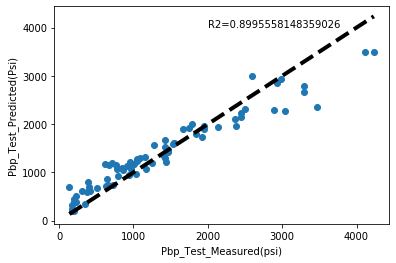

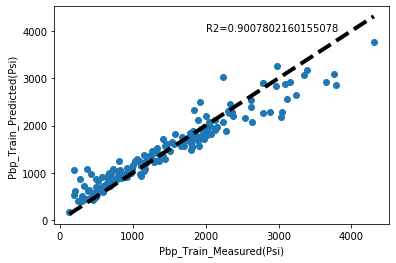

In [5]:
from sklearn.metrics import r2_score
from pylab import scatter, title, show , legend, text, savefig, xlim, ylim
Pbp_test=y_test*(y.max()-y.min())+y.min()
Ppb_train=y_train*(y.max()-y.min())+y.min()
Pbp_test_prediction =clf.predict(X_test)*(y.max()-y.min())+y.min()
Pbp_train_prediction =clf.predict(X_train)*(y.max()-y.min())+y.min()
r2_test= r2_score(Pbp_test, Pbp_test_prediction)
r2_train= r2_score(Ppb_train, Pbp_train_prediction)
fig, ax = plt.subplots()
ax.scatter(Pbp_test, Pbp_test_prediction)
ax.plot([Pbp_test.min(), Pbp_test.max()], [Pbp_test.min(), Pbp_test.max()], 'k--', lw=4)
ax.set_xlabel('Pbp_Test_Measured(psi)')
ax.set_ylabel('Pbp_Test_Predicted(Psi)')
plt.text(2000,4000,"R2="+str(r2_test).format("%.2f"))
plt.show()
fig, ax = plt.subplots()
ax.scatter(Ppb_train, Pbp_train_prediction)
ax.plot([Ppb_train.min(), Ppb_train.max()], [Ppb_train.min(), Ppb_train.max()], 'k--', lw=4)
ax.set_xlabel('Pbp_Train_Measured(Psi)')
ax.set_ylabel('Pbp_Train_Predicted(Psi)')
plt.text(2000,4000,"R2="+str(r2_train).format("%.2f"))
plt.show()


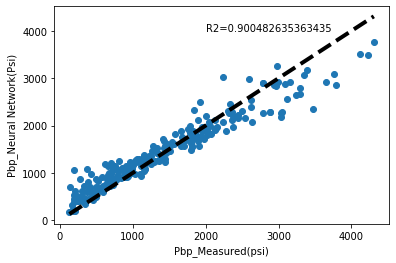

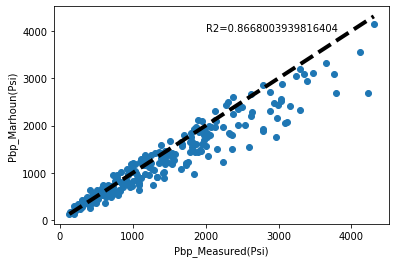

In [6]:
DatasetTempGamma=dataset.copy()
DatasetTempGamma['Temperature'] += 460
DatasetTempGamma['Oil API']=145/(DatasetTempGamma['Oil API']+135)
PBP_Marhoun=0.00538088*(pow(DatasetTempGamma['Rs'],0.715082))*(pow(DatasetTempGamma['Gas Gravity'],-1.877784))*(pow(DatasetTempGamma['Oil API'] ,3.1437)) * (pow(DatasetTempGamma['Temperature'],1.32657) )
Pbp_NN=clf.predict(Xnorm)*(y.max()-y.min())+y.min()

r2_NN= r2_score(dataset['Pbp'], Pbp_NN)
r2_Marhoun= r2_score(dataset['Pbp'], PBP_Marhoun)
fig, ax = plt.subplots()
ax.scatter(dataset['Pbp'], Pbp_NN)
ax.plot([dataset['Pbp'].min(), dataset['Pbp'].max()], [dataset['Pbp'].min(), dataset['Pbp'].max()], 'k--', lw=4)
ax.set_xlabel('Pbp_Measured(psi)')
ax.set_ylabel('Pbp_Neural Network(Psi)')
plt.text(2000,4000,"R2="+str(r2_NN).format("%.2f"))
plt.show()
fig, ax = plt.subplots()
ax.scatter(dataset['Pbp'], PBP_Marhoun)
ax.plot([dataset['Pbp'].min(), dataset['Pbp'].max()], [dataset['Pbp'].min(), dataset['Pbp'].max()], 'k--', lw=4)
ax.set_xlabel('Pbp_Measured(Psi)')
ax.set_ylabel('Pbp_Marhoun(Psi)')
plt.text(2000,4000,"R2="+str(r2_Marhoun).format("%.2f"))
plt.show()

In [7]:
import numpy as np
seed=50
np.random.seed(seed)
y_norm_Ravel=ynorm.values.ravel()
from sklearn.model_selection import cross_val_score
scores_MSE=cross_val_score(clf, Xnorm,
y_norm_Ravel,cv=5,scoring='neg_mean_squared_error')
print("MSE_ Cross-validation scores: {}". format(scores_MSE))
print(" Average Kfold cross-validation MSE_score: {}". format(
scores_MSE.mean()))
scores_R2=cross_val_score(clf, Xnorm, y_norm_Ravel,cv=5,scoring=
'r2')
print(" R2_Cross-validation scores: {}". format(scores_R2))
print(" Average R2_Cross-validation scores: {}". format(
scores_R2.mean()))

MSE_ Cross-validation scores: [-0.0055198  -0.00155995 -0.01205835 -0.01779542 -0.00282173]
 Average Kfold cross-validation MSE_score: -0.007951048760489136
 R2_Cross-validation scores: [0.93905578 0.7947706  0.94509814 0.63662807 0.89653764]
 Average R2_Cross-validation scores: 0.842418044330684


In [8]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import numpy as np
seed=50
np.random.seed(seed)
from sklearn.model_selection import cross_val_score
sh_sp=ShuffleSplit(test_size =.3, train_size =.7, n_splits = 8,random_state=50)
scores=cross_val_score(clf, Xnorm, y_norm_Ravel, cv=sh_sp,scoring
='r2')
print(" Cross-validation scores:{}". format(scores))
print(" Mean R2: {}". format(scores.mean()))

 Cross-validation scores:[0.89955581 0.94445178 0.77980894 0.78714374 0.94654158 0.91353788
 0.79064149 0.84369953]
 Mean R2: 0.8631725957628656


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
import numpy as np
seed=50 
np.random.seed(seed)
hyperparameters=[{'hidden_layer_sizes': [2,3,4,5,6,7], 
'activation': ['relu','tanh'],'solver':['lbfgs'], 'alpha':
[0.0001,0.001,0.01,0.1,1,10], 'batch_size':['auto'], 'learning_rate':
['constant'], 'learning_rate_init':[0.001,0.01,0.1,1], 'max_iter':
[500]}]
MLPR=MLPRegressor()
gridsearch=GridSearchCV(MLPR, hyperparameters, cv=5, verbose=0)
Best_Model=gridsearch.fit(Xnorm, y_norm_Ravel)
print('hidden_layer_sizes:', 
Best_Model.best_estimator_.get_params()['hidden_layer_sizes'])
print('Best activation:', 
Best_Model.best_estimator_.get_params()['activation'])
print('Best alpha:', Best_Model.best_estimator_.get_params()['alpha'])
print('Best learning_rate_init:', 
Best_Model.best_estimator_.get_params()['learning_rate_init']) 
from sklearn.model_selection import cross_val_score
y_norm_Ravel=ynorm.values.ravel()
scores_R2=cross_val_score(Best_Model.best_estimator_,Xnorm, y_norm_Ravel,cv=5,scoring='r2')
print(" R2_Cross-validation scores: {}". format(scores_R2))
print(" Average R2_Cross-validation scores: {}". format(scores_R2.
mean()))

hidden_layer_sizes: 5
Best activation: tanh
Best alpha: 0.0001
Best learning_rate_init: 0.1
 R2_Cross-validation scores: [0.99235881 0.99299505 0.99686479 0.99494015 0.99181047]
 Average R2_Cross-validation scores: 0.9937938544197991


In [10]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
seed=50
np.random.seed(seed)
hyperparametersR={'hidden_layer_sizes': [2,3,4,5,6,7], 
'activation': ['relu','tanh'],'solver':['lbfgs'], 'alpha':
[0.0001,0.001,0.01,0.1,1,10], 'batch_size':['auto'], 'learning_rate':
['constant'], 'learning_rate_init':[0.001,0.01,0.1,1], 'max_iter':
[200]}
MLPR=MLPRegressor()
from sklearn.neural_network import MLPRegressor
seed=50
np.random.seed(seed)
gridsearchR=RandomizedSearchCV(MLPR, hyperparametersR,
random_state=1, cv=5, verbose=0,n_jobs=-1) 
Best_ModelR=gridsearchR.fit(Xnorm, y_norm_Ravel)

print('hidden_layer_sizes:', 
Best_ModelR.best_estimator_.get_params()['hidden_layer_sizes'])
print('Best activation:', 
Best_ModelR.best_estimator_.get_params()['activation'])
print('Best alpha:', Best_ModelR.best_estimator_.get_params()['alpha'])
print('Best learning_rate_init:', 
Best_ModelR.best_estimator_.get_params()['learning_rate_init'])

from sklearn.model_selection import cross_val_score

scores_R2R=cross_val_score(Best_ModelR.best_estimator_, Xnorm, y_norm_Ravel,cv=5,scoring='r2')
print(" R2_Cross-validation scores: {}". format(scores_R2R))
print(" Average R2_Cross-validation scores: {}". format(scores_R2R.
mean()))

hidden_layer_sizes: 6
Best activation: tanh
Best alpha: 0.001
Best learning_rate_init: 0.01
 R2_Cross-validation scores: [0.99458316 0.99552709 0.995924   0.9933157  0.99023985]
 Average R2_Cross-validation scores: 0.9939179607489855
